# Friendship at school
In this notebook we analize the networks of students belonging to different types of schools, calculating various metrices and tools. Additional information about everything is provided in the projext report.<br>
By:
- Guglielmo Biagini
- Elisa Castagnari
- Matteo Fusconi
- Luca Trambaiollo


<a target="_blank" href="https://colab.research.google.com/github/MatteoFusconi/Social-Network-Analysis/blob/main/FriendshipAtSchool.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

 #### setup

In [372]:
try:
  import google.colab
  !git clone https://github.com/MatteoFusconi/Social-Network-Analysis.git
  data_folder = './Social-Network-Analysis/data/'
except ImportError:
  data_folder = './data/'
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os

fatal: destination path 'Social-Network-Analysis' already exists and is not an empty directory.


## Primary School

In [373]:
input_file = data_folder + 'primary_data.txt'

## Middle School

## High School

In [374]:
input_file = data_folder + 'high_data.csv'
contacts = pd.read_csv(input_file, sep= " ", names= ["IDcontact", "ID1", "ID2", "Class1", "Class2"])
contacts

,IDcontact,ID1,ID2,Class1,Class2
0,1385982020,454,640,MP,MP
1,1385982020,1,939,2BIO3,2BIO3
2,1385982020,185,258,PC*,PC*
3,1385982020,55,170,2BIO3,2BIO3
4,1385982020,9,453,PC,PC
...,...,...,...,...,...
188503,1386345560,120,285,PC,PC
188504,1386345580,61,160,2BIO2,2BIO2
188505,1386345580,272,939,2BIO3,2BIO3
188506,1386345580,311,496,PC,PC


# Create adjacency matrix

In [375]:
adjacency_mat=np.zeros((1895,1895))

z=0
for (a,b) in zip(contacts['ID1'].values,contacts['ID2'].values):
  if adjacency_mat[a][b]>=1:
    adjacency_mat[a][b]+=1
    adjacency_mat[b][a]+=1
    z+=1

  else:
    adjacency_mat[a][b]=1
    adjacency_mat[b][a]=1

print((adjacency_mat!=0).sum())
for i in range(1895):
  for j in range(1895):
    if adjacency_mat[i][j]<15:   #we consider two students friends only if they have talked at least _ times (15 times==5 min)
      adjacency_mat[i][j]=0
    else:
      adjacency_mat[i][j]=1
(adjacency_mat==1).sum()

11636


2870

Create a list of nodes that have no conctacts


In [376]:
lista=[]
for i in range(0,1895):
    if np.mean(adjacency_mat[i])==0:
        lista.append(i)
a=0
"""for e in lista:
    e=e+a
    result_matrix = np.delete(adjacency_mat, e, axis=1)
    adjacency_mat = np.delete(result_matrix, e, axis=0)
    a-=1"""

'for e in lista:\n    e=e+a\n    result_matrix = np.delete(adjacency_mat, e, axis=1)\n    adjacency_mat = np.delete(result_matrix, e, axis=0)\n    a-=1'

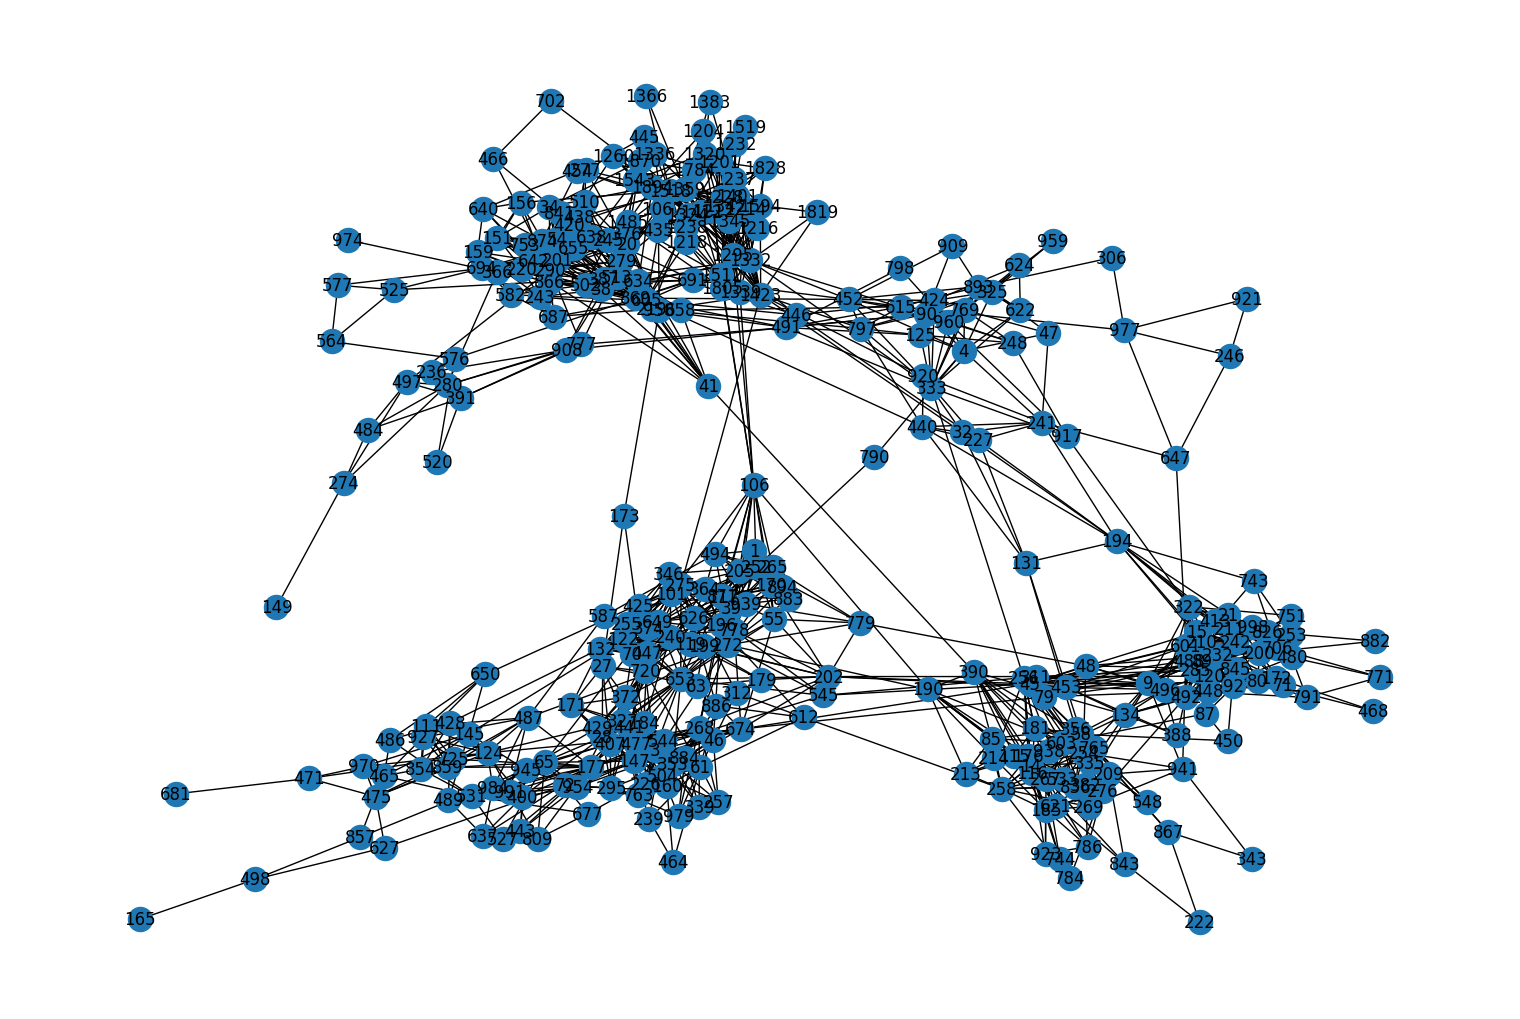

In [377]:
g = nx.from_numpy_array(adjacency_mat)  #create the graph from the adj_mat
g.remove_nodes_from(lista)  #remove the nodes that have no contacts
pos=nx.spring_layout(g)


#uncomment to draw the graph
#plt.figure(figsize=(15,10))
#nx.draw(g,pos,with_labels = True)

# METADATA


In [378]:
metadata = pd.read_csv('metadata_2013.txt', sep="\t", header=None)

metadata.columns = ["ID", "class", "gender"]
m=metadata.replace(['M','F','Unknown'],[1,2,3]) ###!!!!!!!!
m=m.replace(['2BIO1', '2BIO2', '2BIO3' ,'MP', 'MP*1', 'MP*2', 'PC' ,'PC*' ,'PSI*'],[0,1,2,3,4,5,6,7,8])
#m.set_index('ID',inplace=True)
np.savetxt('meta2.txt',np.array(m),fmt='%.1d')
print(m)

      ID  class  gender
0    650      0       2
1    498      0       2
2    627      0       2
3    857      0       2
4    487      0       2
..   ...    ...     ...
324   58      7       3
325  209      7       3
326  979      1       3
327  205      2       1
328  520      3       2

[329 rows x 3 columns]


In [379]:
(m['gender']==3).sum()

7

In [380]:
# Read the attributes from an input file
input_file = "meta2.txt"
node_id = 0

node_attributes = []

with open(input_file, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 3:
            id,course,gender = int(parts[0]),int(parts[1]), int(parts[2])
            node_attributes.append({'id': id, 'course':course,  'gender':gender})

# Set the attributes for nodes in the graph
node_ids = metadata['ID'].values  # Assuming node IDs correspond to node order in the input file

for i, node_id in enumerate(node_ids):
    attributes = node_attributes[i]
    nx.set_node_attributes(g, {node_id: attributes})

# Example: Print attributes for a specific node (e.g., node with ID 1)
node_id = 0
attributes = g.nodes[3]
print(attributes)
print(f"Node {node_id} attributes - id: {attributes['id']}, course: {attributes['course']}, gender: {attributes['gender']}")

{'id': 3, 'course': 1, 'gender': 1}
Node 0 attributes - id: 3, course: 1, gender: 1


# Metrics

Degree Centrality

In [381]:
centr=nx.degree_centrality(g)
mas=max(centr)
centr[mas]

0.027863777089783284

Transitivity

In [382]:
nx.transitivity(g)

0.3503006012024048

Density

In [383]:
nx.density(g)

0.027424225050644038

Homophily

In [384]:
nx.attribute_assortativity_coefficient(g,'gender')

0.2302258646577993

K-cores

Plot K-cores

In [409]:
#plt.figure(figsize=(14,6))


G_1_core = nx.k_core(g, k= 5)
G_2_core = nx.k_core(g, k= 6)
G_3_core = nx.k_core(g, k= 7)

k_mask = []
for i in g.nodes():
  if i in G_3_core.nodes():
    k_mask.append(3)
  elif i in G_2_core.nodes():
    k_mask.append(2)
  elif i in G_1_core.nodes():
    k_mask.append(1)
  else:
    k_mask.append(0)
print(k_mask)

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

cmap = plt.get_cmap('Reds')
norm = Normalize(vmin=0, vmax=4)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a mapping of 'alcohol' attribute values to colors
color_legend = {0: '0-core', 1: '1-core', 2: '2-core', 3: '3-core'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [cmap(norm(k)) for k in k_mask]

# Draw the graph with node colors
pos = nx.spring_layout(g,k=0.3)  # You can choose a different layout if desired
#nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
#legend_labels = {v: k for k, v in color_legend.items()}
#legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(legend_labels[label])), markersize=10, label=label) for label in color_legend.values()]

#plt.legend(handles=legend_handles, title='K-cores_Uni', loc='upper left')










#plt.show()

[1, 3, 1, 3, 3, 3, 2, 3, 1, 3, 1, 1, 2, 3, 2, 3, 1, 0, 3, 2, 3, 3, 3, 0, 2, 3, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 0, 2, 1, 1, 3, 0, 3, 3, 3, 0, 3, 2, 0, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 0, 3, 3, 2, 3, 1, 2, 0, 3, 1, 3, 0, 0, 3, 1, 3, 1, 2, 0, 0, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 2, 0, 2, 0, 3, 2, 2, 0, 3, 0, 3, 0, 3, 1, 3, 0, 0, 3, 3, 3, 3, 1, 3, 2, 2, 3, 1, 0, 3, 0, 1, 3, 3, 2, 0, 3, 1, 3, 2, 1, 1, 3, 0, 0, 0, 3, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 3, 0, 1, 3, 3, 3, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 1, 0, 3, 3, 2, 0, 1, 1, 0, 0, 3, 0, 2, 0, 2, 1, 2, 0, 3, 0, 3, 1, 1, 2, 0, 0, 1, 2, 1, 0, 3, 3, 1, 0, 0, 0, 2, 3, 3, 0, 0, 0, 3, 3, 0, 1, 0, 0, 1, 0, 0, 3, 3, 0, 0, 3, 1, 0, 1, 2, 0, 2, 3, 1, 0, 3, 3, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 3, 3, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 1, 3, 3, 3, 2, 2, 0, 2, 1, 1, 3, 2, 3, 2, 1, 3, 3, 3, 3, 0, 0, 3, 2, 3, 1, 3, 3, 0, 2, 3, 1, 3, 0, 2, 0, 1]


In [386]:
classes=np.unique(metadata['class'].values)
print(classes)

['2BIO1' '2BIO2' '2BIO3' 'MP' 'MP*1' 'MP*2' 'PC' 'PC*' 'PSI*']


# Create the classes

In [387]:
BIO_1=metadata[metadata['class']=='2BIO1']
BIO_2=metadata[metadata['class']=='2BIO2']
BIO_3=metadata[metadata['class']=='2BIO3']
MP=metadata[metadata['class']=='MP']
MP_1=metadata[metadata['class']=='MP*1']
MP_2=metadata[metadata['class']=='MP*2']
PC=metadata[metadata['class']=='PC']
PC_2=metadata[metadata['class']=='PC*']
PSI=metadata[metadata['class']=='PSI*']





Create the subgraph for a particular class

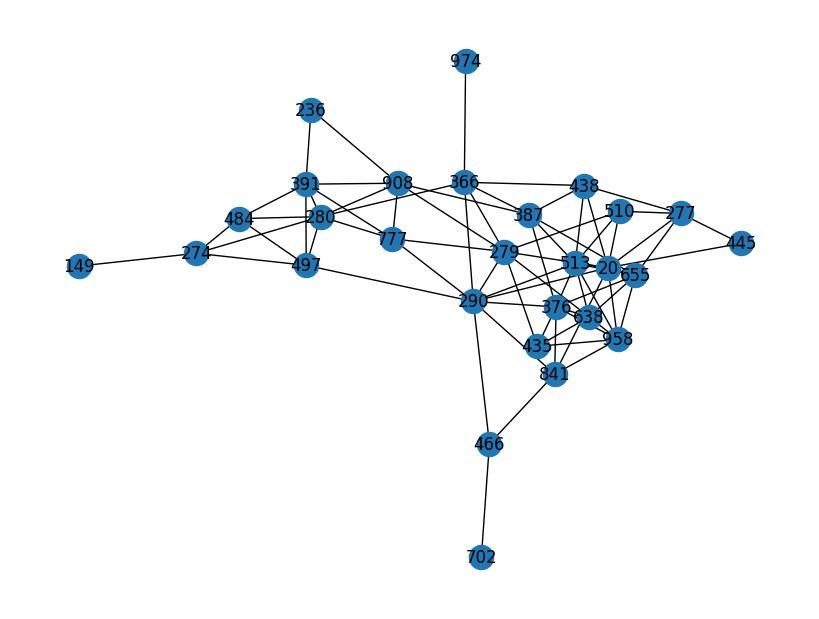

In [410]:
#classes=np.concatenate((MP['ID'].values,BIO_2['ID'].values))
classes=MP_1['ID'].values
sg=g.subgraph(classes)
nx.spring_layout(sg,k=0.5)
plt.figure(figsize=(8,6))
nx.draw(sg,with_labels=True)
plt.savefig('highschool_graph')

# Metrics for the subclass

Degree Centrality

In [389]:
centr_s=nx.degree_centrality(sg)
centr_s[max(centr_s)]

0.037037037037037035

Transitivity

In [390]:
nx.transitivity(sg)

0.4

Density

In [391]:
nx.density(sg)

0.1931216931216931

Homophily

In [392]:
nx.attribute_assortativity_coefficient(sg,'gender')

0.11515151515151499

K-cores

{513: 0.6428571428571428,
 290: 0.42857142857142855,
 387: 0.3571428571428571,
 376: 0.5714285714285714,
 510: 0.2857142857142857,
 841: 0.2857142857142857,
 366: 0.2857142857142857,
 655: 0.5,
 435: 0.2857142857142857,
 20: 0.6428571428571428,
 277: 0.2857142857142857,
 438: 0.3571428571428571,
 279: 0.42857142857142855,
 958: 0.5,
 638: 0.42857142857142855}

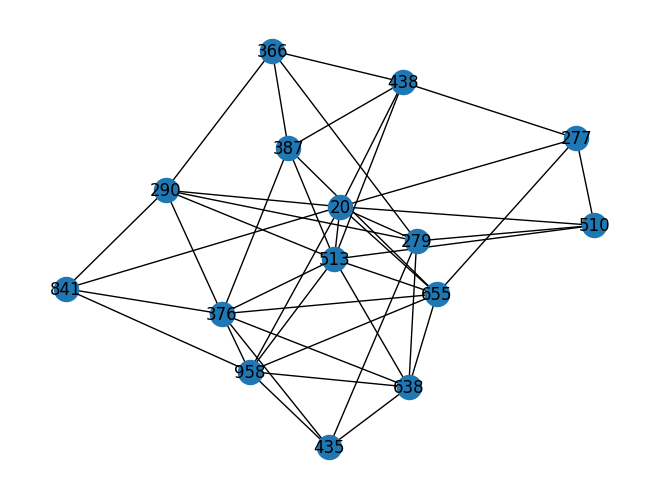

In [393]:
a=nx.k_core(sg)
nx.draw(a,with_labels=True)
nx.degree_centrality(a)

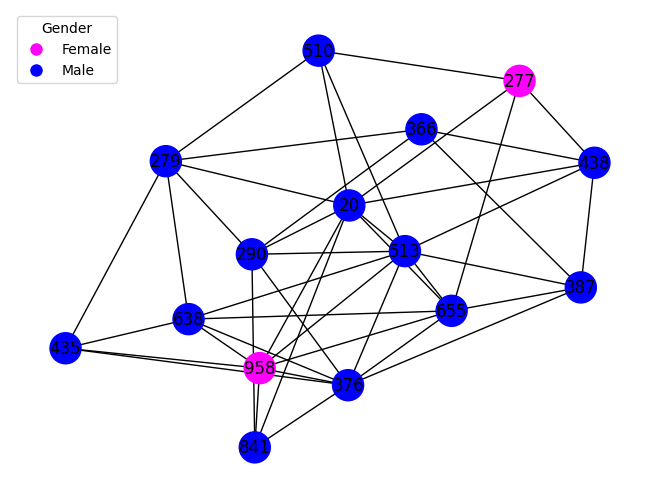

In [394]:
# Create a mapping of 'sex' attribute values to colors
color_map = {2: 'magenta', 1: 'blue'}
color_legend = {2: 'Female', 1: 'Male'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[a.nodes[node]['gender']] for node in a.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(a,k=0.3)  # You can choose a different layout if desired
nx.draw(a, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Gender', loc='upper left')
plt.savefig('gender_feature')
plt.show()

Il 4 core è composto principalmente da maschi (questo probabilmente anche perchè sono più maschi

[4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 1, 4, 3, 4, 4, 4, 2, 1, 4, 4, 1, 2, 3, 2, 4, 3, 4, 4]


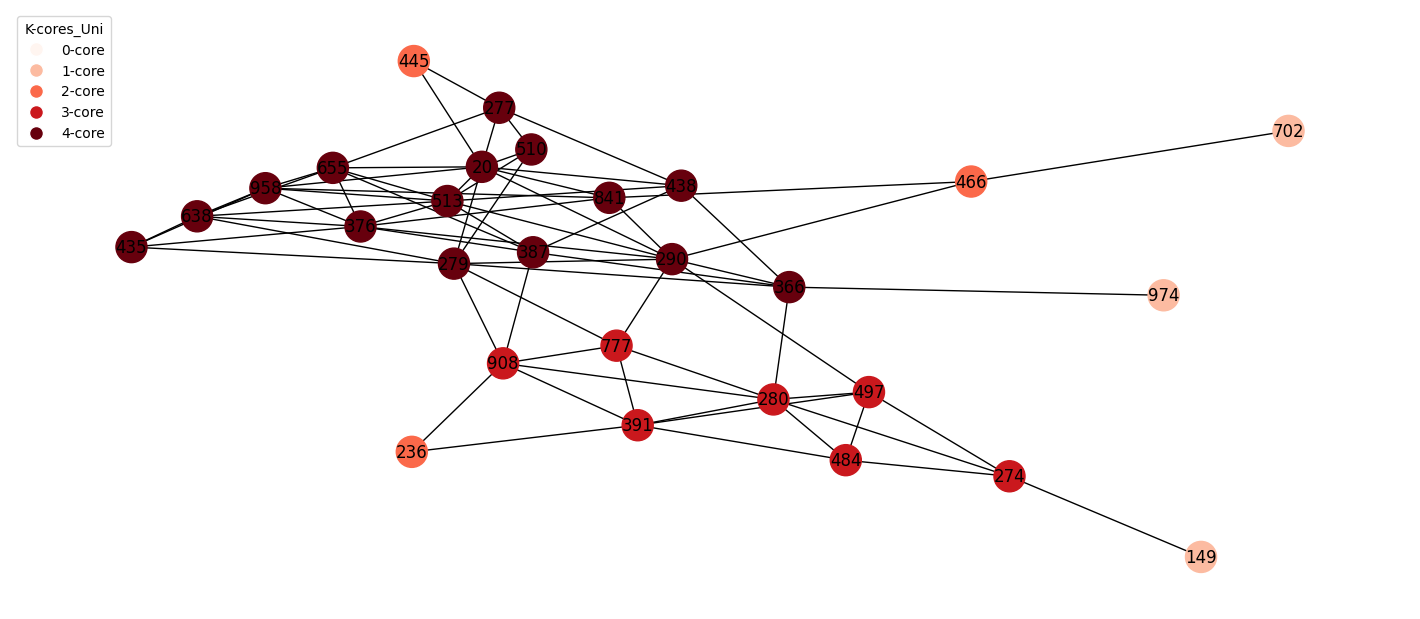

In [403]:
plt.figure(figsize=(14,6))

G_1_core=nx.k_core(sg, k= 1)
G_2_core = nx.k_core(sg, k= 2)
G_3_core = nx.k_core(sg, k= 3)
G_4_core = nx.k_core(sg, k= 4)

k_mask = []
for i in sg.nodes():
  if i in G_4_core.nodes():
    k_mask.append(4)
  elif i in G_3_core.nodes():
    k_mask.append(3)
  elif i in G_2_core.nodes():
    k_mask.append(2)
  elif i in G_1_core.nodes():
    k_mask.append(1)
  else:
    k_mask.append(0)
print(k_mask)

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

cmap = plt.get_cmap('Reds')
norm = Normalize(vmin=0, vmax=4)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a mapping of 'alcohol' attribute values to colors
color_legend = {0:'0-core',1: '1-core', 2: '2-core',3: '3-core', 4: '4-core'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [cmap(norm(k)) for k in k_mask]

# Draw the graph with node colors
pos = nx.spring_layout(sg,k=0.3)  # You can choose a different layout if desired
nx.draw(sg, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(legend_labels[label])), markersize=10, label=label) for label in color_legend.values()]

plt.legend(handles=legend_handles, title='K-cores_Uni', loc='upper left')










plt.show()

# Gender map

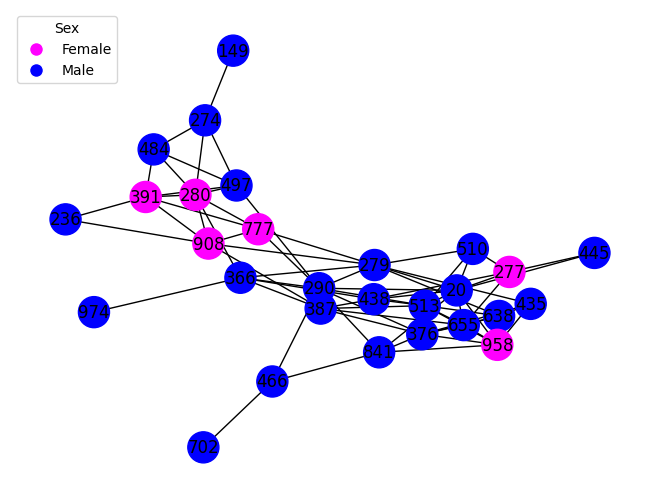

In [405]:
# Create a mapping of 'sex' attribute values to colors
color_map = {2: 'magenta', 1: 'blue'}
color_legend = {2: 'Female', 1: 'Male'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[sg.nodes[node]['gender']] for node in sg.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(sg,k=0.3)  # You can choose a different layout if desired
nx.draw(sg, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')
plt.savefig('gender_feature')
plt.show()

In [397]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [398]:
def draw(G, pos, measures, measure_name):

    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')


# Centrality graph

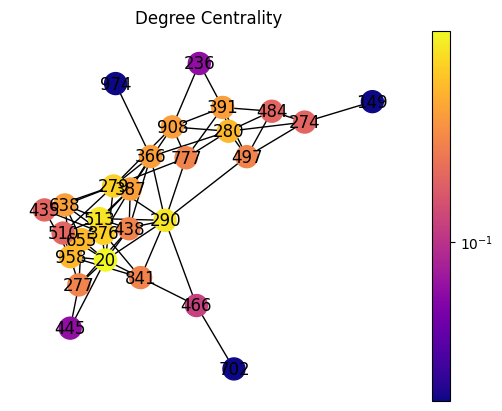

In [399]:
pos = nx.spring_layout(sg, seed=675)
draw(sg, pos, nx.degree_centrality(sg), 'Degree Centrality')
plt.savefig('centrality_high.png')
plt.show()

In [400]:
stop from here, delete this to continue

SyntaxError: ignored

# From survey

In [ ]:
input_file = data_folder + 'high_school_survey.csv'
survey = pd.read_csv(input_file, sep= " ", names= [ "ID1", "ID2", "Friendiship"])
print(survey)

In [ ]:
data_survey=survey[survey['Friendiship']>=1]

In [ ]:
adjacency_surv=np.zeros((1895,1895))

z=0
for (a,b) in zip(data_survey['ID1'].values,data_survey['ID2'].values):
  adjacency_surv[a][b]=1
  adjacency_surv[b][a]=1

In [ ]:
lista2=[]
for i in range(0,1895):
    if np.mean(adjacency_surv[i])==0:
        lista2.append(i)


In [ ]:
g_s = nx.from_numpy_array(adjacency_surv)  #create the graph from the adj_mat
g_s.remove_nodes_from(lista2)  #remove the nodes that have no contacts
pos=nx.spring_layout(g_s)

plt.figure(figsize=(15,10))
nx.draw(g_s,pos,with_labels = True)

In [ ]:
# Read the attributes from an input file
input_file = "meta2.txt"
node_id = 0

node_attributes = []

with open(input_file, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 3:
            id,course,gender = int(parts[0]),int(parts[1]), int(parts[2])
            node_attributes.append({'id': id, 'course':course,  'gender':gender})

# Set the attributes for nodes in the graph
node_ids = metadata['ID'].values  # Assuming node IDs correspond to node order in the input file

for i, node_id in enumerate(node_ids):
    attributes = node_attributes[i]
    nx.set_node_attributes(g_s, {node_id: attributes})

# Example: Print attributes for a specific node (e.g., node with ID 1)
node_id = 0
attributes = g_s.nodes[3]
print(attributes)
print(f"Node {node_id} attributes - id: {attributes['id']}, course: {attributes['course']}, gender: {attributes['gender']}")

In [ ]:
#classes=np.concatenate((MP_1['ID'].values,PC_2['ID'].values))
classes=PC['ID'].values
sg_s=g_s.subgraph(classes)
nx.spring_layout(sg_s,k=0.5)
plt.figure(figsize=(8,6))
nx.draw(sg_s,with_labels=True)

# second survey

In [ ]:
input_file = data_folder + 'high_school_survey_2.csv'
survey = pd.read_csv(input_file, sep= " ", names= [ "ID1", "ID2"])
print(survey)

In [ ]:
adjacency_surv=np.zeros((1895,1895))

z=0
for (a,b) in zip(data_survey['ID1'].values,data_survey['ID2'].values):
  adjacency_surv[a][b]=1
  adjacency_surv[b][a]=1

In [ ]:
lista2=[]
for i in range(0,1895):
    if np.mean(adjacency_surv[i])==0:
        lista2.append(i)


In [ ]:
g_s = nx.from_numpy_array(adjacency_surv)  #create the graph from the adj_mat
g_s.remove_nodes_from(lista2)  #remove the nodes that have no contacts
pos=nx.spring_layout(g_s)

plt.figure(figsize=(15,10))
nx.draw(g_s,pos,with_labels = True)

In [ ]:
# Read the attributes from an input file
input_file = "meta2.txt"
node_id = 0

node_attributes = []

with open(input_file, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 3:
            id,course,gender = int(parts[0]),int(parts[1]), int(parts[2])
            node_attributes.append({'id': id, 'course':course,  'gender':gender})

# Set the attributes for nodes in the graph
node_ids = metadata['ID'].values  # Assuming node IDs correspond to node order in the input file

for i, node_id in enumerate(node_ids):
    attributes = node_attributes[i]
    nx.set_node_attributes(g_s, {node_id: attributes})

# Example: Print attributes for a specific node (e.g., node with ID 1)
node_id = 0
attributes = g_s.nodes[3]
print(attributes)
print(f"Node {node_id} attributes - id: {attributes['id']}, course: {attributes['course']}, gender: {attributes['gender']}")

In [ ]:
#classes=np.concatenate((MP_1['ID'].values,PC_2['ID'].values))
classes=PC_2['ID'].values
sg_s=g_s.subgraph(classes)
nx.spring_layout(sg_s,k=0.5)
plt.figure(figsize=(8,6))
nx.draw(sg_s,with_labels=True)

A coefficient close to zero suggests a lack of correlation between the attributes of connected nodes.